In [1]:
import os
import glob
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

Using TensorFlow backend.


In [2]:
def draw_images(generator, x, dir_name, index):
    # 出力ファイルの設定
    save_name = 'extened-' + str(index)
    g = generator.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix=save_name, save_format='jpg')

    # 1つの入力画像から何枚拡張するかを指定
    # g.next()の回数分拡張される
    for i in range(5):
        bach = g.next()

In [3]:
# 出力先ディレクトリの設定
output_dir = "extended_scam"
if not(os.path.exists(output_dir)):
    os.mkdir(output_dir)

# 拡張する画像群の読み込み
images = glob.glob(os.path.join('./scam_imgs/', "*.jpg"))

# 拡張する際の設定
generator = ImageDataGenerator(
                rotation_range=30, # 90°まで回転
                width_shift_range=0.1, # 水平方向にランダムでシフト
                height_shift_range=0.1, # 垂直方向にランダムでシフト
#                 channel_shift_range=50.0, # 色調をランダム変更
#                shear_range=0.39, # 斜め方向(pi/8まで)に引っ張る
                horizontal_flip=True, # 垂直方向にランダムで反転
#                 vertical_flip=True, # 水平方向にランダムで反転
                samplewise_center=False,
                featurewise_std_normalization=False,
                samplewise_std_normalization=False,
                zca_whitening=True, #ZCA白色化
                zca_epsilon=1e-6, #ZCAのパラメータ 
                zoom_range=0.1,
                channel_shift_range=0.,
                fill_mode='nearest',
                cval=0.,
                rescale=None,
                )

# 読み込んだ画像を順に拡張
for i in range(len(images)):
    img = load_img(images[i])
    # 画像を配列化して転置a
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # 画像の拡張
    draw_images(generator, x, output_dir, i)

/home/inouelab/.conda/envs/keras35/lib/python3.5/site-packages/keras/preprocessing/image.py:554: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


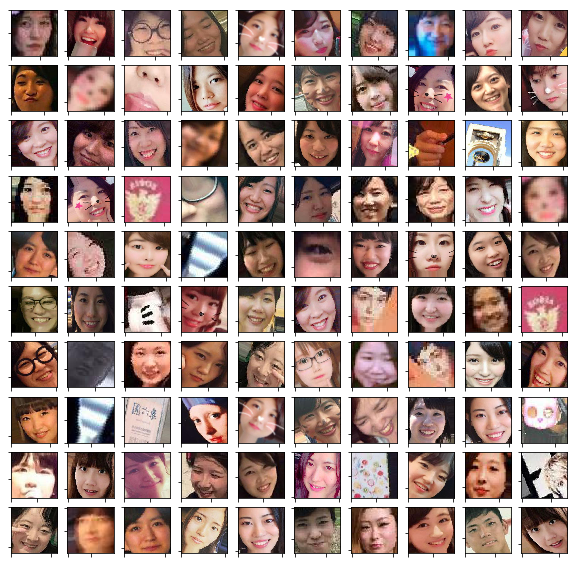

In [9]:
from PIL import Image
import os
import matplotlib.pyplot as plt
%matplotlib inline
res_files=os.listdir('./extended/')
images=[]
fig = plt.figure(figsize=(10,10 ))
for i in range(100):
    images.append(np.array(Image.open('./extended/'+res_files[i])))
for i in range(1, 101):
    plt.subplot(10,10 , i)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.imshow( images[i - 1] )
plt.savefig('data.png')

In [7]:
import os
res_files=os.listdir('./extended/')
len(res_files)

1584